In [4]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [10]:
train_df = pd.read_csv('exoTrain.csv')
train_df.head(10)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
5,2,211.10,163.57,179.16,187.82,188.46,168.13,203.46,178.65,166.49,...,-98.45,30.34,30.34,29.62,28.80,19.27,-43.90,-41.63,-52.90,-16.16
6,2,9.34,49.96,33.30,9.63,37.64,20.85,4.54,22.42,10.11,...,-58.56,9.93,9.93,23.50,5.28,-0.44,10.90,-11.77,-9.25,-36.69
7,2,238.77,262.16,277.80,190.16,180.98,123.27,103.95,50.70,59.91,...,-72.48,31.77,31.77,53.48,27.88,95.30,48.86,-10.62,-112.02,-229.92
8,2,-103.54,-118.97,-108.93,-72.25,-61.46,-50.16,-20.61,-12.44,1.48,...,43.92,7.24,7.24,-7.45,-18.82,4.53,21.95,26.94,34.08,44.65
9,2,-265.91,-318.59,-335.66,-450.47,-453.09,-561.47,-606.03,-712.72,-685.97,...,3671.03,2249.28,2249.28,2437.78,2584.22,3162.53,3398.28,3648.34,3671.97,3781.91


In [14]:
train_df.shape

(5087, 3198)

In [16]:
train_df[train_df.isnull().any(axis = 1)] 

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197


<Axes: >

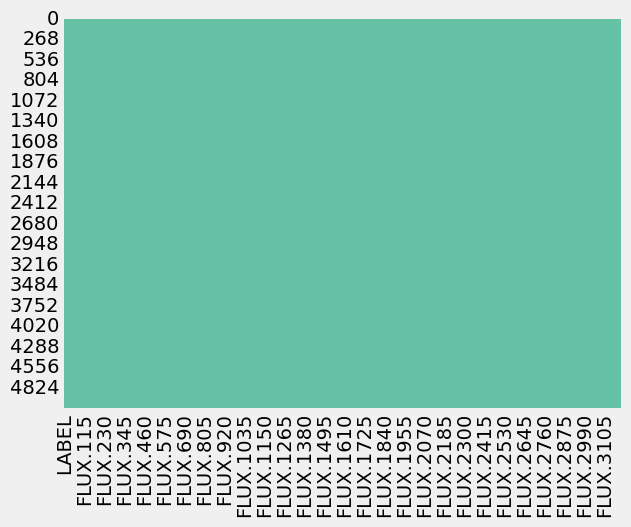

In [18]:
sns.heatmap(train_df.isnull(), cmap = 'Set2', cbar = False)


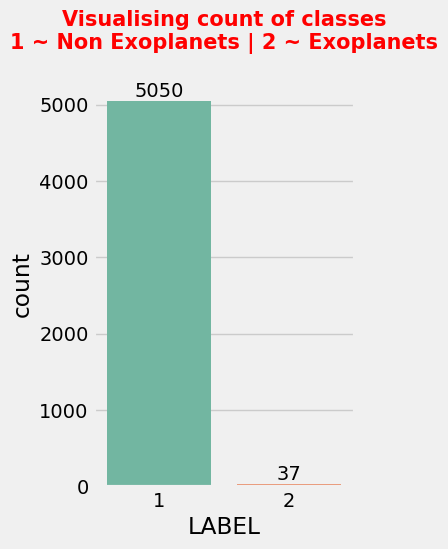

In [22]:
# Visualise these values using countplot
plt.figure(figsize = (3, 5))                                                   
ax = sns.countplot(x='LABEL', data = train_df, palette = 'Set2')                    
ax.bar_label(ax.containers[0])
plt.title("Visualising count of classes\n1 ~ Non Exoplanets | 2 ~ Exoplanets\n", 
          fontsize = 15, color = 'red', weight = 'bold')
plt.show()


In [24]:
# Replacing labels 
train_df = train_df.replace({'LABEL' : {1:0, 2:1}})
print("Replacing labels...")

# Check the labels now
print("Done!\n")
uniq_val = train_df.LABEL.unique()
print(f"There are {len(uniq_val)} classes in the data:-")
print(f"{uniq_val[0]} - Stars with Exoplanets\n{uniq_val[1]} - Stars without Exoplantes")

Replacing labels...
Done!

There are 2 classes in the data:-
1 - Stars with Exoplanets
0 - Stars without Exoplantes


In [26]:
# Drop label column to plot only the flux values
plot_df = train_df.drop(['LABEL'], axis = 1)

# X - axis data: Replace FLUX. from each column names
col_names = list(plot_df.columns)
time = [int(flux_prefix.replace("FLUX.", "")) for flux_prefix in col_names]

# Function to plot flux variation of star
def flux_plot(df, candidate, exo = True):
    color = 'b' if exo == True else 'm'
    plt.figure(figsize=(15, 5))
    plt.plot(time, df.iloc[candidate-1], linewidth = .5, color = color)
    title1, clr1 = f"Flux Variation of star {candidate} with Exoplanents", 'olive'
    title2, clr2 = f"Flux Variation of star {candidate} without Exoplanets", 'tab:red'
    plt.title(title1, color = clr1) if exo == True else plt.title(title2, color = clr2)
    plt.xlabel("Time")
    plt.ylabel("Flux Variation")

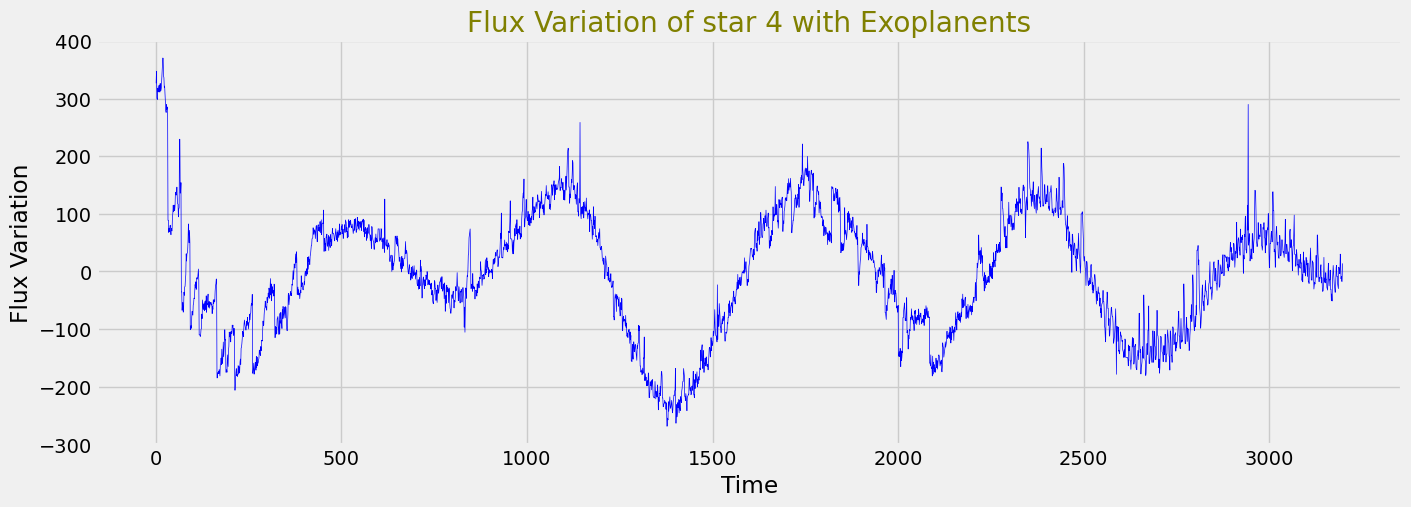

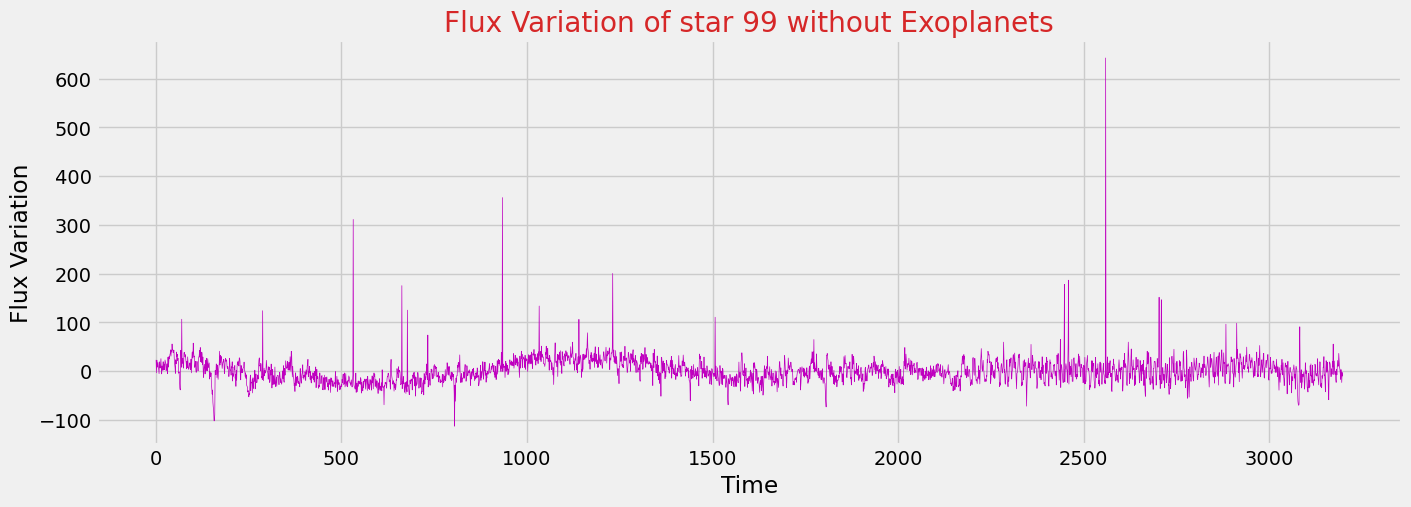

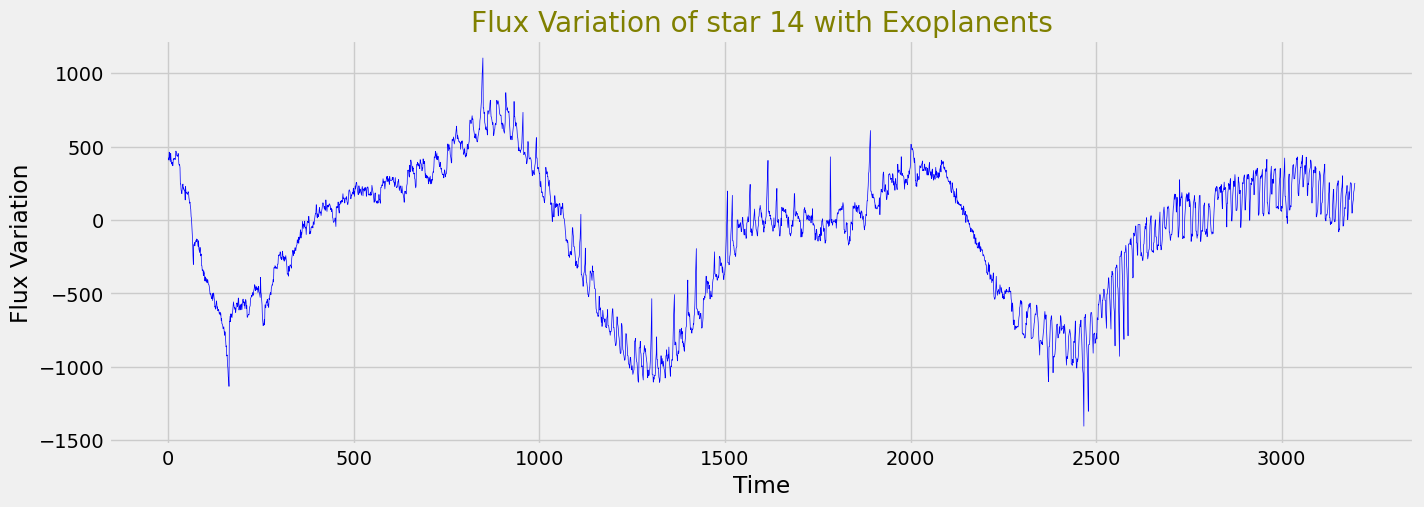

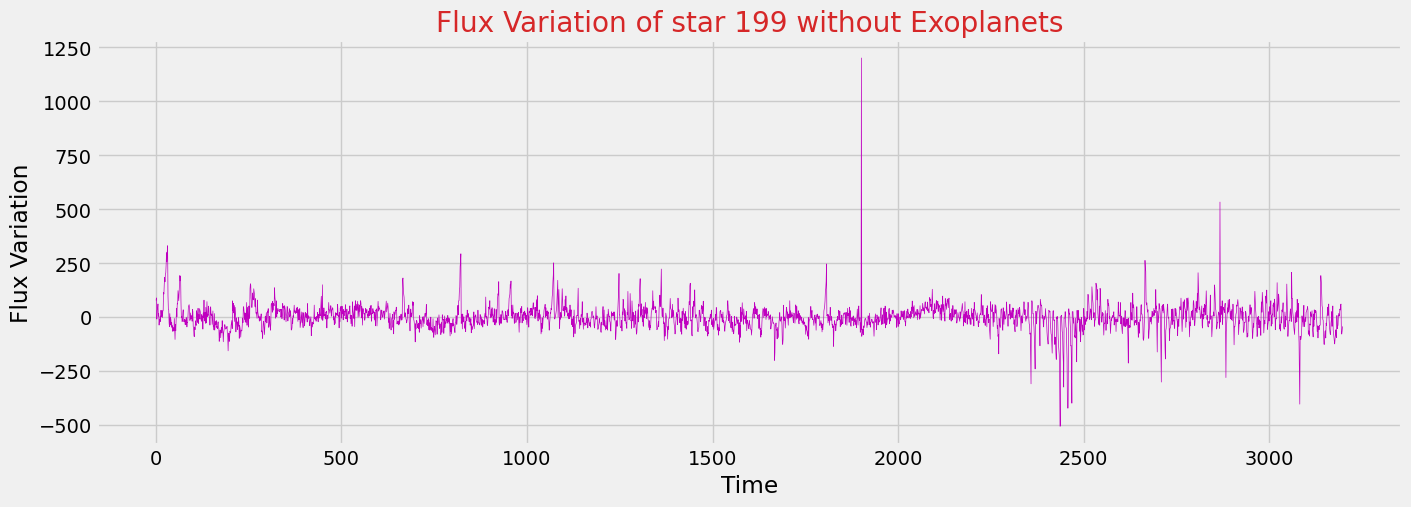

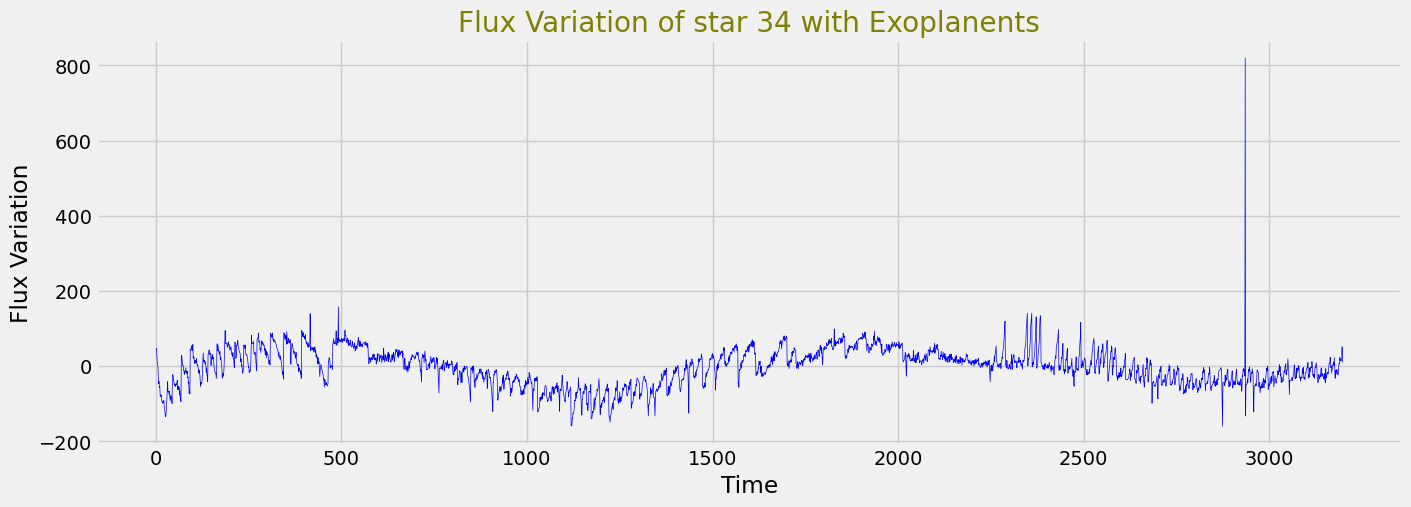

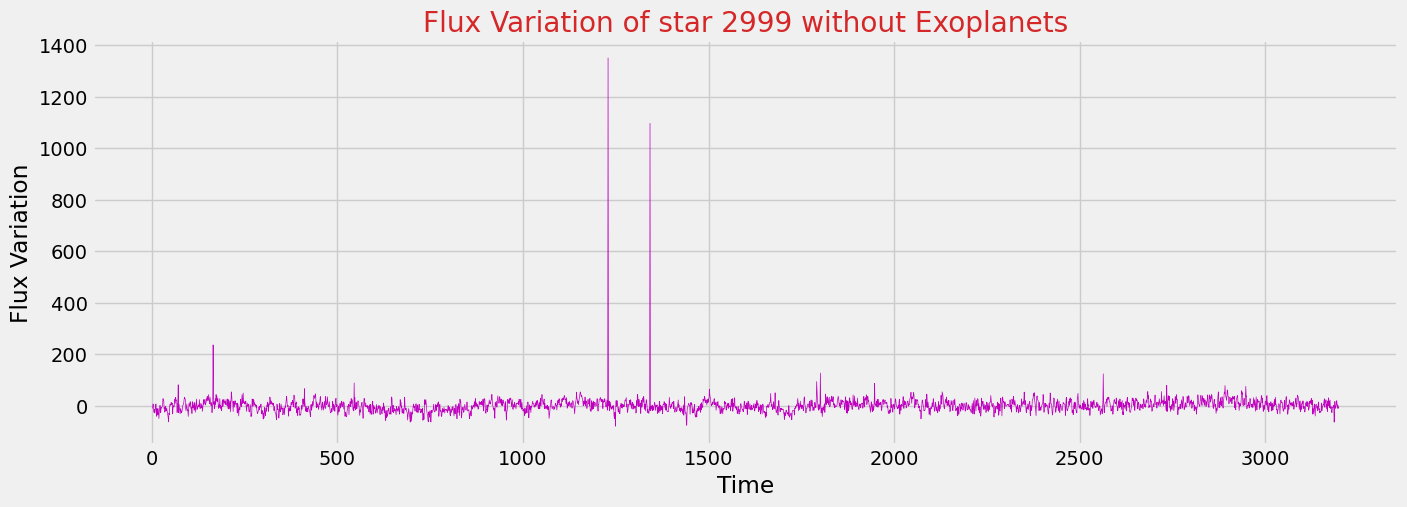

In [28]:
# Example of light curves
exo, n_exo = [4, 14, 34], [99, 199, 2999]

for candidate in range(len(exo)):
    flux_plot(plot_df, exo[candidate], exo = True)
    flux_plot(plot_df, n_exo[candidate], exo = False)

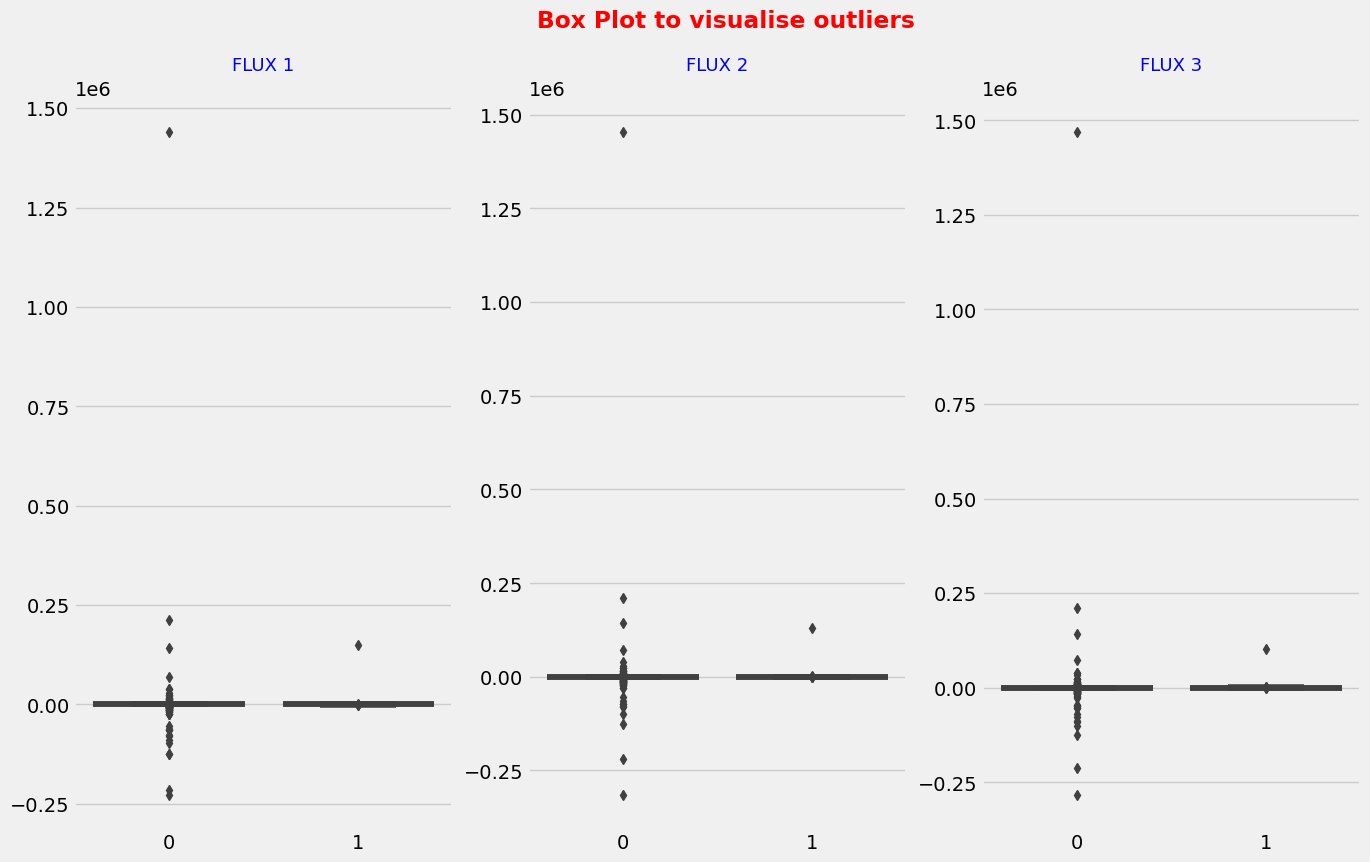

In [30]:
# Boxplot to visualise outliers
plt.figure(figsize = (20, 9))
plt.suptitle("Box Plot to visualise outliers", ha = 'right', color = 'red', weight = 'bold')
for i in range(1, 4):
    plt.subplot(1, 4, i)
    sns.boxplot(data=train_df, x='LABEL', y = 'FLUX.' + str(i))
    plt.xlabel("")
    plt.ylabel("")
    plt.title("FLUX " + str(i) + "\n", color = 'b', fontsize = 13)

In [32]:
# Get the extreme outliers
extreme_outliers = train_df[train_df['FLUX.2'] > 0.25e6]
extreme_outliers

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
3340,0,1439240.5,1453319.0,1468429.0,1495750.0,1510937.0,1508152.5,1465743.0,1416827.0,1342888.5,...,469144.5,514999.0,563276.0,587067.5,589078.5,583560.0,288607.5,215972.0,193191.0,185221.5


In [34]:
# Drop the extreme outlier
print("Droping Extreme Outliers...")
train_df.drop(extreme_outliers.index, axis = 0, inplace = True)  # axis = 0 ----> row
print("Done!")

Droping Extreme Outliers...
Done!


<Axes: xlabel='LABEL', ylabel='FLUX.177'>

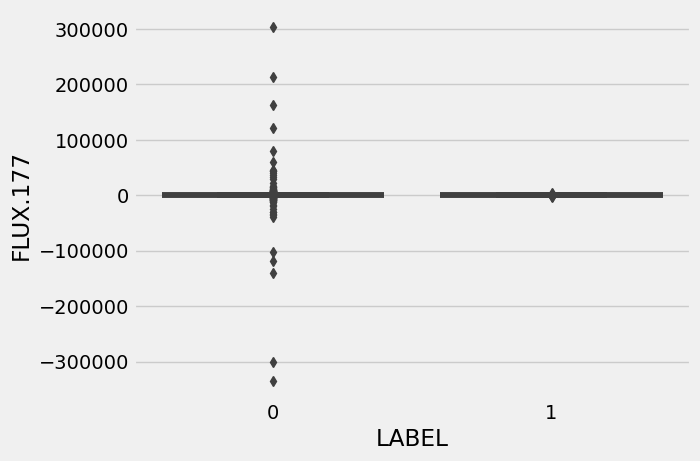

In [36]:
# Cross check via any random box plot
sns.boxplot(data=train_df, x='LABEL', y = 'FLUX.' + str(np.random.randint(1000)))

In [38]:
# Extract dependent and independent features
x = train_df.drop(['LABEL'], axis = 1)
y = train_df.LABEL

print(f"Take a look over ~\n\nX train array:-\n{x.values}\n\nY train array:-\n{y.values}")

Take a look over ~

X train array:-
[[ 93.85  83.81  20.1  ...  61.42   5.08 -39.54]
 [-38.88 -33.83 -58.54 ...   6.46  16.    19.93]
 [532.64 535.92 513.73 ... -28.91 -70.02 -96.67]
 ...
 [273.39 278.   261.73 ...  88.42  79.07  79.43]
 [  3.82   2.09  -3.29 ... -14.55  -6.41  -2.55]
 [323.28 306.36 293.16 ... -16.72 -14.09  27.82]]

Y train array:-
[1 1 1 ... 0 0 0]


In [40]:
# Splitting this dataset into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [42]:
# Feature scaling
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# Checking the minimum, mean and maxmum value after scaling
print("X_train after scaling ~\n")
print(f"Minimum:- {round(np.min(X_train_sc),2)}\nMean:- {round(np.mean(X_train_sc),2)}\nMax:- {round(np.max(X_train_sc), 2)}\n")
print("--------------------------------\n")
print("X_test after scaling ~\n")
print(f"Minimum:- {round(np.min(X_test_sc),2)}\nMean:- {round(np.mean(X_test_sc),2)}\nMax:- {round(np.max(X_test_sc), 2)}\n")

X_train after scaling ~

Minimum:- -57.1
Mean:- 0.0
Max:- 59.46

--------------------------------

X_test after scaling ~

Minimum:- -133.38
Mean:- 0.0
Max:- 112.18




Validation accuracy of KNN is 0.991480996068152

-------------------------------------------------------

Classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1513
           1       0.00      0.00      0.00        13

    accuracy                           0.99      1526
   macro avg       0.50      0.50      0.50      1526
weighted avg       0.98      0.99      0.99      1526



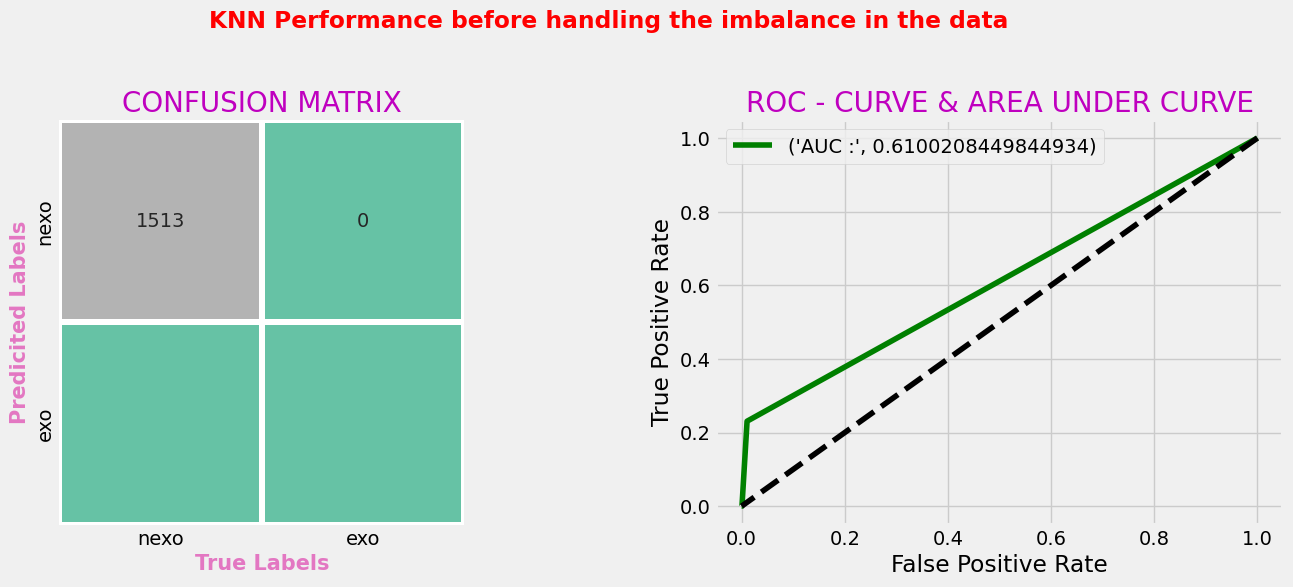

In [44]:
# Fiting the KNN Classifier Model on to the training data
from sklearn.neighbors import KNeighborsClassifier as KNC

# Choosing K = 10
knn_classifier = KNC(n_neighbors=5,metric='minkowski',p=2)  
'''metric is to be by default minkowski for p = 2 to calculate the Eucledian distances'''

# Fit the model
knn_classifier.fit(X_train_sc, y_train)

# Predict
y_pred = knn_classifier.predict(X_test_sc)

# Results
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

print('\nValidation accuracy of KNN is', accuracy_score(y_test,y_pred))
print("\n-------------------------------------------------------")
print ("\nClassification report :\n",(classification_report(y_test,y_pred)))

#Confusion matrix
plt.figure(figsize=(15,11))
plt.subplots_adjust(wspace = 0.3)
plt.suptitle("KNN Performance before handling the imbalance in the data", color = 'r', weight = 'bold')
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="Set2",fmt = "d",linewidths=3, cbar = False,
           xticklabels=['nexo', 'exo'], yticklabels=['nexo','exo'], square = True)
plt.xlabel("True Labels", fontsize = 15, weight = 'bold', color = 'tab:pink')
plt.ylabel("Predicited Labels", fontsize = 15, weight = 'bold', color = 'tab:pink')
plt.title("CONFUSION MATRIX",fontsize=20, color = 'm')

#ROC curve and Area under the curve plotting
predicting_probabilites = knn_classifier.predict_proba(X_test_sc)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("AUC :",auc(fpr,tpr)),color = "g")
plt.plot([1,0],[1,0],"k--")
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20, color = 'm')
plt.show()

In [46]:
# Handling imbalanced data using RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x, y)  # Taking the original x, y as arguments

print(f"Before sampling:- {Counter(y)}")
print(f"After sampling:- {Counter(y_ros)}")

Before sampling:- Counter({0: 5049, 1: 37})
After sampling:- Counter({1: 5049, 0: 5049})


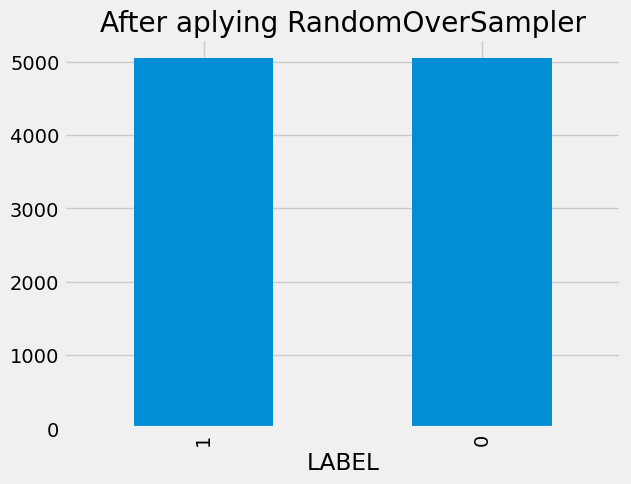

In [48]:
# Visualise it
y_ros.value_counts().plot(kind='bar', title='After aplying RandomOverSampler');

In [50]:
#  ****************************************************************
# | Performing split and scaling on the random over sampled data  |
# ****************************************************************

X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size = 0.3, random_state = 0)

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [52]:
def optimal_Kval_KNN(start_k, end_k, x_train, x_test, y_train, y_test, progress = True):
    ''' 
    This function takes in the following arguments -
    start_k - start value of k
    end_k - end value of k
    x_train - independent training values for training the KNN
    x_test - independent testing values for prediction
    y_train - dependent training values for training KNN
    y_test - dependent testing values for computing error rate
    progress - if true shows the progress for each k (by default its set to True)
    '''
    # Header
    print(f"Fetching the optimal value of K in between {start_k} & {end_k} ~\n\nIn progress...")
    
    # Empty list to append error rate
    mean_err = []
    for K in range(start_k, end_k + 1):                         # Generates K from start to end-1 values
        knn = KNC(n_neighbors = K)                              # Build KNN for respective K value
        knn.fit(x_train, y_train)                               # Train the model
        err_rate = np.mean(knn.predict(x_test) != y_test)       # Get the error rate
        mean_err.append(err_rate)                               # Append it
        # If progress is true display the error rate for each K
        if progress == True:print(f'For K = {K}, mean error = {err_rate:.3}')
        
    # Get the optimal value of k and corresponding value of mean error
    k, val = mean_err.index(min(mean_err))+1, min(mean_err)
    
    # Footer
    print('\nDone! Here is how error rate varies wrt to K values:- \n')
    
    # Display how error rate changes wrt K values and mark the optimal K value
    plt.figure(figsize = (5,5))
    plt.plot(range(start_k,end_k + 1), mean_err, 'mo--', markersize = 8, markerfacecolor = 'c',
            linewidth = 1)          # plots all mean error wrt K values
    plt.plot(k, val, marker = 'o', markersize = 8, markerfacecolor = 'gold', 
             markeredgecolor = 'g') # highlits the optimal K
    plt.title(f"The optimal performance is obtained at K = {k}", color = 'r', weight = 'bold',
             fontsize = 15)
    plt.ylabel("Error Rate", color = 'olive', fontsize = 13)
    plt.xlabel("K values", color = 'olive', fontsize = 13)
    
    '''returns the optimal value of k'''
    return k

Fetching the optimal value of K in between 1 & 10 ~

In progress...
For K = 1, mean error = 0.00132
For K = 2, mean error = 0.00132
For K = 3, mean error = 0.00264
For K = 4, mean error = 0.00264
For K = 5, mean error = 0.00462
For K = 6, mean error = 0.00462
For K = 7, mean error = 0.00528
For K = 8, mean error = 0.00528
For K = 9, mean error = 0.00792
For K = 10, mean error = 0.00792

Done! Here is how error rate varies wrt to K values:- 



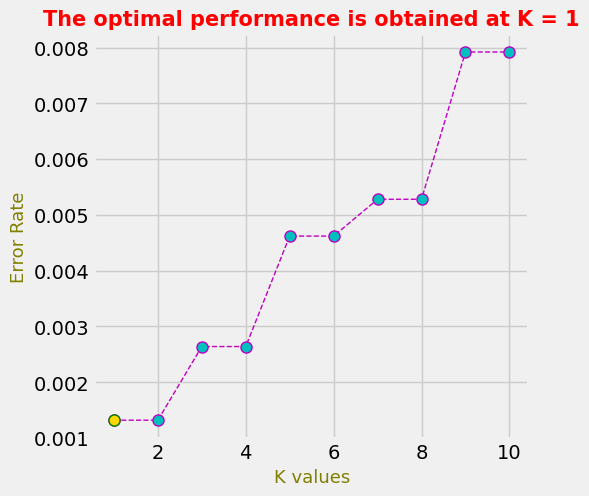

In [54]:
k = optimal_Kval_KNN(1, 10, X_train_sc, X_test_sc, y_train, y_test)


Validation accuracy of KNN is 0.9986798679867986

-------------------------------------------------------

Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1512
           1       1.00      1.00      1.00      1518

    accuracy                           1.00      3030
   macro avg       1.00      1.00      1.00      3030
weighted avg       1.00      1.00      1.00      3030



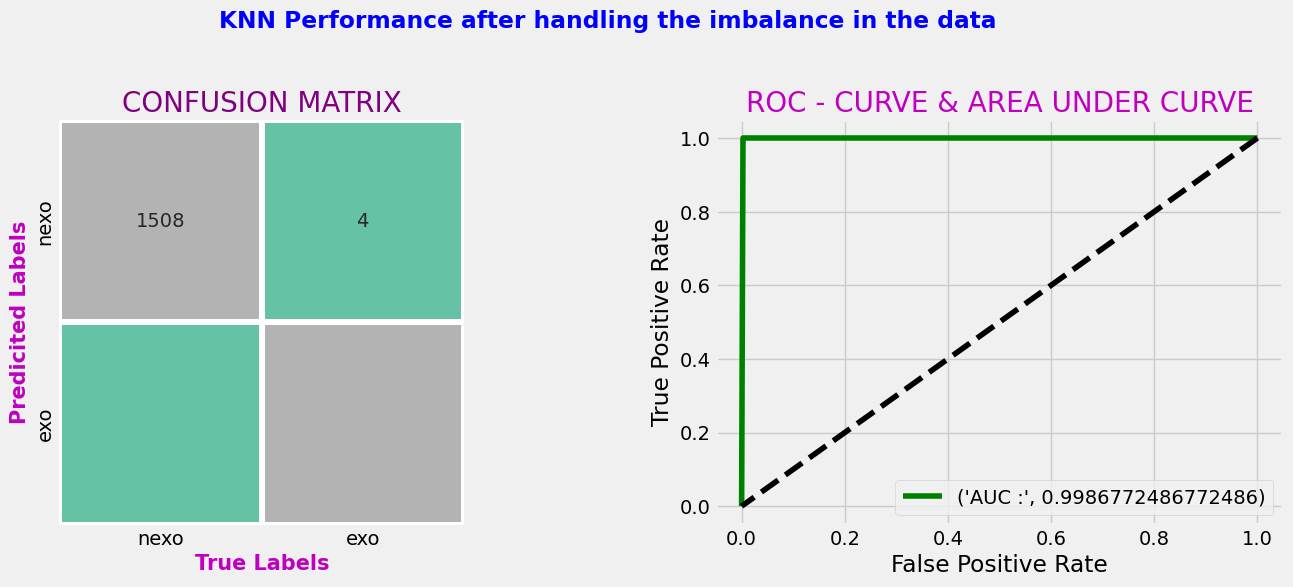

In [56]:
# Fiting the KNN Classifier Model on to the training data after

# Choosing K = 1
knn_classifier = KNC(n_neighbors=1,metric='minkowski',p=2)  
'''metric is to be by default minkowski for p = 2 to calculate the Eucledian distances'''

# Fit the model
knn_classifier.fit(X_train_sc, y_train)

# Predict
y_pred = knn_classifier.predict(X_test_sc)

# Results
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

print('\nValidation accuracy of KNN is', accuracy_score(y_test,y_pred))
print("\n-------------------------------------------------------")
print ("\nClassification report :\n",(classification_report(y_test,y_pred)))

#Confusion matrix
plt.figure(figsize=(15,11))
plt.subplots_adjust(wspace = 0.3)
plt.suptitle("KNN Performance after handling the imbalance in the data", color = 'b', weight = 'bold')
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="Set2",fmt = "d",linewidths=3, cbar = False,
           xticklabels=['nexo', 'exo'], yticklabels=['nexo','exo'], square = True)
plt.xlabel("True Labels", fontsize = 15, weight = 'bold', color = 'm')
plt.ylabel("Predicited Labels", fontsize = 15, weight = 'bold', color = 'm')
plt.title("CONFUSION MATRIX",fontsize=20, color = 'purple')

#ROC curve and Area under the curve plotting
predicting_probabilites = knn_classifier.predict_proba(X_test_sc)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("AUC :",auc(fpr,tpr)),color = "g")
plt.plot([1,0],[1,0], 'k--')
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20, color = 'm')
plt.show()

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle  # If you want to save and load the model

In [66]:
with open("optimal_Kval_KNN.pkl", "wb") as file:
    pickle.dump(knn_classifier, file)

In [106]:
with open("optimal_Kval_KNN.pkl", "rb") as file:
    knn_model = pickle.load(file)

In [148]:
test_data = pd.read_csv("exoTest.csv")  # Change to your actual test dataset file
test_df = test_data.replace({'LABEL' : {1:0, 2:1}})
print("Replacing labels...")
X_test = test_df.drop(columns=["LABEL"], axis=1)  # Drop target column
y_test = test_df["LABEL"]  # Extract target labels
# Load test data


# Check the labels now
print("Done!\n")

Replacing labels...
Done!



In [ ]:
print("Unique labels in y:", y.unique())

In [150]:
y_pred = knn_model.predict(X_test)

In [152]:
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy:.2f}")

print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))

# 🔹 Save predictions (optional)
test_data["Predicted_Label"] = y_pred
test_data.to_csv("test_predictions.csv", index=False)
print("🚀 Predictions saved to 'test_predictions.csv'.")

✅ Model Accuracy: 0.98

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       565
           1       0.12      0.20      0.15         5

    accuracy                           0.98       570
   macro avg       0.56      0.59      0.57       570
weighted avg       0.99      0.98      0.98       570

🚀 Predictions saved to 'test_predictions.csv'.
